#### Resumen previo:
Tomo un dominio mas aplio, simetrico alrededor de $\rho=0$ tal que podamos ver que pasa en ese eje con las ecuaciones. Resuelvo mi problema original, solo que simetrico y una grilla de dimensiones mas pequeñas. 

Luego de ese note hay otro que debo separalo para tener un note mas pequeño, que trabaja sobre la idea del note "1DP1_3" pero en dos dimensiones. Ese no logro hacer que funcione aun
## Problema espejado en $\rho=0$ 
Aca busco resolver el problema  en un dominio $\Omega= [-L,L]\times[0,L]$
\begin{equation}
\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f =\Delta_{cil} f +\frac{2}{\rho}\partial_{\rho} f=-8\pi \alpha
\end{equation}

$$\int (\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f)v*\rho $$
Condiciones de borde $$\partial_{\rho} f |_{z=0}=0$$ $$(\pm \rho \partial_{\rho}f +z \partial_z f + f)|_{\rho=\pm L ,z=L}=0$$ Y para el factor conforme tenemos

\begin{equation}
\Delta \psi + \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }=0=\frac{1}{\rho} \partial_{\rho}(\rho \partial_{\rho}\psi)+ \partial_z ^2 \psi+ \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }
\end{equation}
Condiciones de borde $$\partial_{\rho} \psi |_{z=0}=0$$ $$\pm \rho \partial_{\rho}\psi+z \partial_z \psi +(\psi -1)|_{\rho=\pm L ,z=L}=0$$

La idea de simetrizar el problema a lo largo del eje $\psi=0$ es evitar y estudiar la cond de borde de Neuman Homogenea dada la simetria del problema. 

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  !Atom 
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays

In [3]:
#model = GmshDiscreteModel("modelos/box1_resol.msh")
model0 = GmshDiscreteModel("modelos/box1_gruesa.msh")
model1 = GmshDiscreteModel("modelos/box1_refin.msh")

Info    : Reading 'modelos/box1_gruesa.msh'...
Info    : 9 entities
Info    : 5986 nodes
Info    : 11970 elements
Info    : Done reading 'modelos/box1_gruesa.msh'
Info    : Reading 'modelos/box1_refin.msh'...
Info    : 9 entities
Info    : 93961 nodes
Info    : 187920 elements
Info    : Done reading 'modelos/box1_refin.msh'                            


UnstructuredDiscreteModel()

In [4]:
Ω0 = Triangulation(model0)
degree = 3
dΩ0 = Measure(Ω0,degree)

Ω1 = Triangulation(model1)
dΩ1 = Measure(Ω1,degree)

Measure()

In [5]:
writevtk(Ω1,"square")
writevtk(Ω0,"square")

(["square.vtu"],)

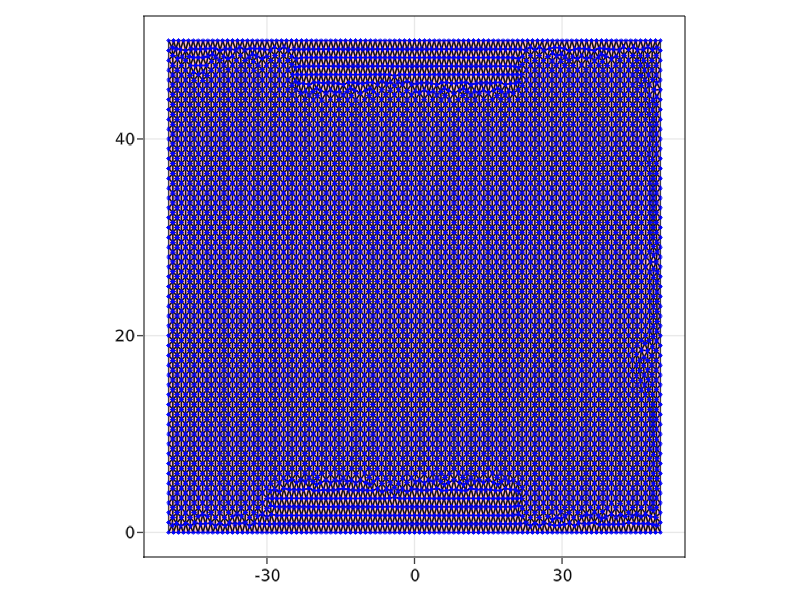

In [6]:
if Atom == false 
    fig, ax = plot(Ω0)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω0, color=:black, linewidth=1)
    scatter!(Ω0, marker=:star8, markersize=4, color=:blue)
    fig
end 

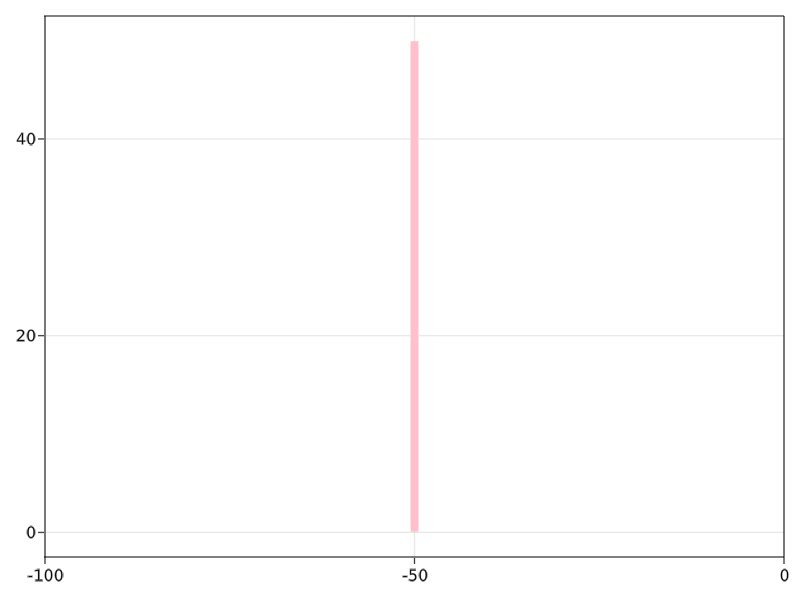

In [7]:
neumanntags_rhoI0= ["extrhoficc"]
Γ_rhoI0 = BoundaryTriangulation(model0,tags=neumanntags_rhoI0)
dΓ_rhoI0 = Measure(Γ_rhoI0,degree)


neumanntags_rhoI1= ["extrhoficc"]
Γ_rhoI1 = BoundaryTriangulation(model1,tags=neumanntags_rhoI1)
dΓ_rhoI1 = Measure(Γ_rhoI1,degree)

if Atom == false 
    fig = plot(Γ_rhoI0, linewidth=8
    #, shading=true
    )
end


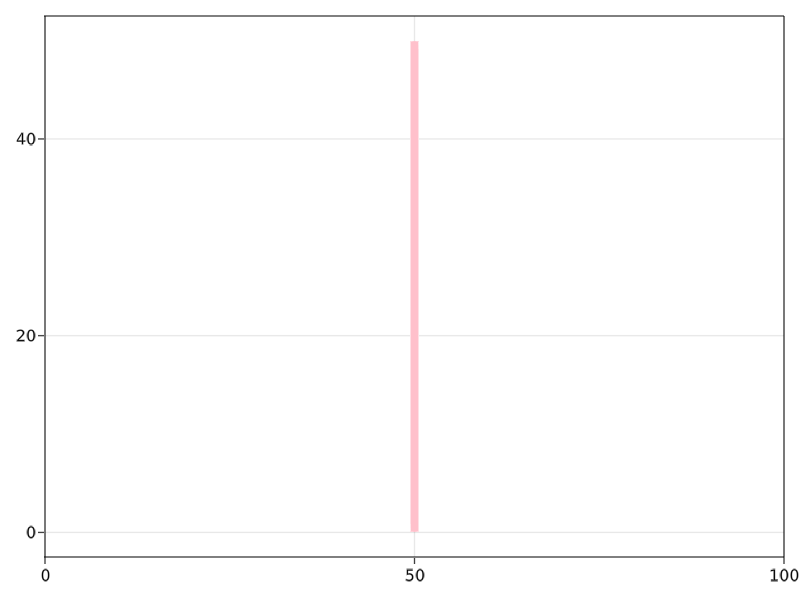

In [13]:
neumanntags_rho0= [ "extrho"]
Γ_rho0 = BoundaryTriangulation(model0,tags=neumanntags_rho0)
dΓ_rho0= Measure(Γ_rho0,degree)

neumanntags_rho1= [ "extrho"]
Γ_rho1 = BoundaryTriangulation(model1,tags=neumanntags_rho1)
dΓ_rho1= Measure(Γ_rho1,degree)

if Atom == false 
    fig = plot(Γ_rho0, linewidth=8
    #, shading=true
      )
end


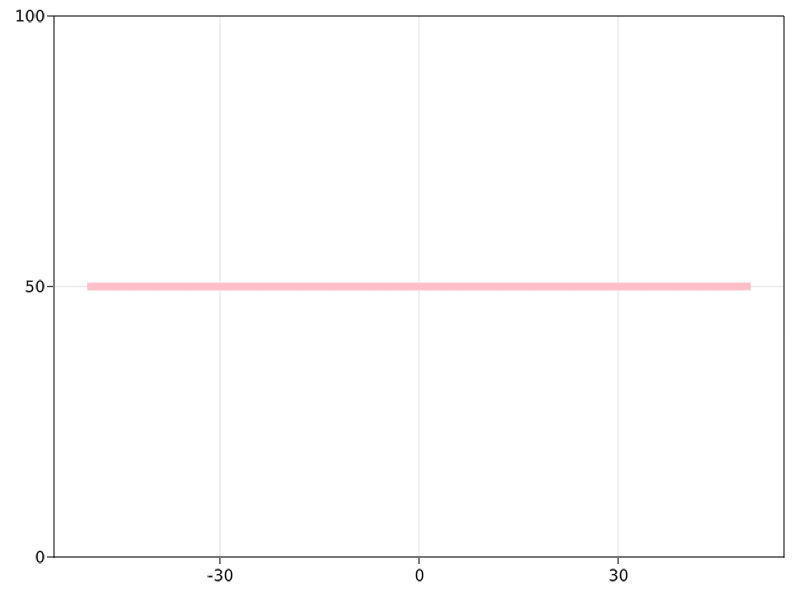

In [9]:
neumanntags_extz0 = [ "extz"]
Γ_extz0 = BoundaryTriangulation(model0,tags=neumanntags_extz0)
dΓ_extz0 = Measure(Γ_extz0,degree)


neumanntags_extz1 = [ "extz"]
Γ_extz1 = BoundaryTriangulation(model1,tags=neumanntags_extz1)
dΓ_extz1 = Measure(Γ_extz1,degree)

if Atom == false 
    fig = plot(Γ_extz0, linewidth=8
    #, shading=true
   )
end    


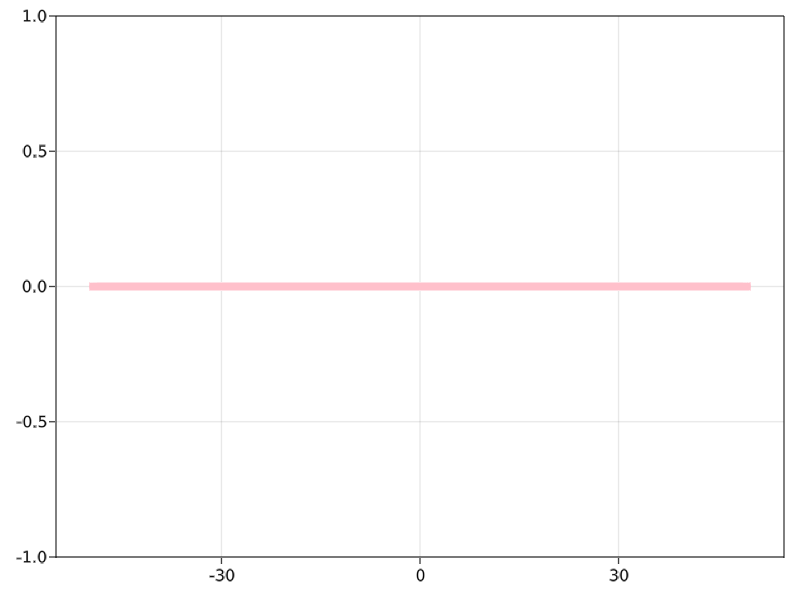

In [11]:
neumanntags_intz = [  "intz" ]
Γ_intz0 = BoundaryTriangulation(model0,tags=neumanntags_intz)
dΓ_intz0 = Measure(Γ_intz0,degree)

Γ_intz1 = BoundaryTriangulation(model1,tags=neumanntags_intz)
dΓ_intz1 = Measure(Γ_intz1,degree)

if Atom == false 
    fig = plot(Γ_intz1, linewidth=8
    #, shading=true
   )
end   



In [15]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V0 = TestFESpace(model0,reffe,conformity=:H1)
U0 = TrialFESpace(V0)

V1 = TestFESpace(model1,reffe,conformity=:H1)
U1 = TrialFESpace(V1)

UnconstrainedFESpace()

## Función $f$

In [16]:
vacio = false

false

In [17]:
a0=0.01
R=30
Z=30
s(x) = sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

if vacio == false
    function α(x)
        if abs(s(x))  < 1.
            return  q(x)*a0
        end
        if abs(s(x)) >= 1.
           return  0.
        end
    end
end

if vacio == true
    function α(x)
        return  0.
    end    
end

t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.

c (generic function with 1 method)

$$\rho \partial_{\rho} f +z \partial_z f+ f=0$$
$$\rho * w * \partial_z f$$

In [19]:
d(x) = VectorValue(2. ,0)

d (generic function with 1 method)

In [20]:
ρ(x)=abs(x[1])
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]
sig(x)= sign(x[1])

sig (generic function with 1 method)

In [22]:
a_0(u,v) = ∫(- ∇(v) ⋅ ∇(u)*ρ +(d  ⋅ ∇(u))*sig*v  ) *dΩ0 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_rho0 +∫( -v *( u +(zvec ⋅ ∇(u))*z)  ) *dΓ_rhoI0 +   ∫(- v *(u  *ρ /z +(ρvec ⋅ ∇(u))*sig*ρ *ρ/z) ) *dΓ_extz0  
b_0(v) = ∫(-v * t* ρ) *dΩ0 - ∫(c * v* ρ ) *dΓ_intz0 

b_0 (generic function with 1 method)

In [23]:
a_1(u,v) = ∫(- ∇(v) ⋅ ∇(u)*ρ +(d  ⋅ ∇(u))*sig*v  ) *dΩ1 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_rho1 +∫( -v *( u +(zvec ⋅ ∇(u))*z)  ) *dΓ_rhoI1 +   ∫(- v *(u  *ρ /z +(ρvec ⋅ ∇(u))*sig*ρ *ρ/z) ) *dΓ_extz1  
b_1(v) = ∫(-v * t* ρ) *dΩ1 - ∫(c * v* ρ ) *dΓ_intz1

b_1 (generic function with 1 method)

In [24]:
op0 = AffineFEOperator(a_0,b_0,U0,V0)
op1 = AffineFEOperator(a_1,b_1,U1,V1)

AffineFEOperator()

In [25]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [28]:
uh0= solve(solver,op0)

SingleFieldFEFunction():
 num_cells: 11670
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2638209346253164464

In [29]:
u_0 = Interpolable(uh0)
u0= interpolate_everywhere(u_0,U1)

SingleFieldFEFunction():
 num_cells: 186720
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14934840492360893133

In [30]:
uh1,= solve!(u0,solver,op1)

(SingleFieldFEFunction(), LUNumericalSetup())

In [31]:
writevtk(Ω0,"resultados/f_ref1",cellfields=["f"=>uh0])
writevtk(Ω1,"resultados/f_ref_0",cellfields=["f"=>uh1])

(["resultados/f_ref_0.vtu"],)

In [32]:
f10=ρvec ⋅ ∇(uh0)
f20=zvec ⋅ ∇(uh0)
F0=f20*f20 +f10*f10

f11=ρvec ⋅ ∇(uh1)
f21=zvec ⋅ ∇(uh1)
F1=f21*f21 +f11*f11

OperationCellField():
 num_cells: 186720
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14934840492360893133

In [33]:
invrho3(x)=3. /x[1]

invrho3 (generic function with 1 method)

residual es
$$\partial_{\rho} ^2 f +\partial_z ^2 f+ \frac{3}{\rho} \partial_{\rho} f + 8 \pi a =0 = \Delta(f) + \frac{3}{\rho} \partial_{\rho} f + 8 \pi a $$

### Factor conforme

In [34]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [35]:
res0(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F0 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))  ) *dΩ0 + ∫(c * w2* ρ ) *dΓ_intz0  +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rho0 + ∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rhoI0+   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*sig*ρ*ρ/z) ) *dΓ_extz0
res1(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F1 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))  ) *dΩ1 + ∫(c * w2* ρ ) *dΓ_intz1  +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rho1 + ∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rhoI1+   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*sig*ρ*ρ/z) ) *dΓ_extz1

res1 (generic function with 1 method)

In [36]:
jac0(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F0 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w)) ) *dΩ0 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rhoI0 +∫(- w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rho0+   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*sig*ρ*ρ/z) ) *dΓ_extz0
jac1(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F1 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w)) ) *dΩ1 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rhoI1 +∫(- w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rho1+   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*sig*ρ*ρ/z) ) *dΓ_extz1 

jac1 (generic function with 1 method)

In [38]:
oppsi0 = FEOperator(res0,jac0,U0,V0)
oppsi1 = FEOperator(res1,jac1,U1,V1)

FEOperatorFromWeakForm()

In [39]:
using LineSearches: BackTracking
nls = NLSolver(show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [41]:
seed(x)=1.
w00=interpolate_everywhere(seed,U0)

SingleFieldFEFunction():
 num_cells: 11670
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2638209346253164464

In [42]:
w0, = solve!(w00,solver,oppsi0)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     9.501490e+01              NaN
     1     3.716457e+01     4.723594e+02
     2     1.449453e+01     5.881507e+02
     3     5.645517e+00     7.325690e+02
     4     2.196881e+00     8.562675e+02
     5     8.394145e-01     8.827071e+02
     6     2.955746e-01     7.294550e+02
     7     7.900285e-02     4.217488e+02
     8     2.766765e-02     1.242767e+02
     9     4.646306e-03     1.480397e+01
    10     9.385870e-05     2.767127e-01
    11     3.279534e-08     9.300247e-05
    12     1.412204e-13     1.071077e-11
    13     1.342537e-13     1.430711e-25
    14     1.272871e-13     1.722774e-27
    15     1.095790e-13     2.564291e-28
    16     1.095790e-13     8.238666e-29
    17     1.095790e-13     3.066697e-29
    18     1.095790e-13     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [44]:
writevtk(Ω0,"resultados/Fact_refi0",cellfields=["ψ"=>w0])

(["resultados/Fact_refi0.vtu"],)

In [48]:
w_0= Interpolable(w0)
w0_0=interpolate_everywhere(w_0,U1)

SingleFieldFEFunction():
 num_cells: 186720
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14934840492360893133

In [49]:
w1, = solve!(w0_0,solver,oppsi1)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     8.289880e-03              NaN
     1     9.919541e-10     3.951019e-04
     2     1.772471e-13     6.620300e-13
     3     1.579709e-13     6.903982e-26
     4     1.566525e-13     5.415816e-26
     5     1.343925e-13     2.665576e-26
     6     1.392914e-13     1.212819e-26
     7     1.346701e-13     9.104145e-27
     8     1.394440e-13     7.280052e-27
     9     1.394440e-13     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [50]:
writevtk(Ω1,"resultados/Fact_refin1",cellfields=["ψ"=>w1])

(["resultados/Fact_refin1.vtu"],)